In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import sys
from math import sqrt

# Bar Graph

In [5]:
sets = ["SG.txt", "SA.txt", "FC.txt", "NF.txt"]

# shape: prescient/noroles/roles, SG/SA/FC/NF, nsamples, word/letter
data = np.empty((3,4,10,2))
# shape: prescient/noroles/roles, SG/SA/FC/NF, word/letter
means = np.empty((3,4,2))

for i, nq in enumerate(["*_e2e_enc_", "*_e2e_enc_query_1_", "*_e2e_enc_given_roles_"]):
    for j, file in enumerate(sets):
        data[i,j,:,:] = np.loadtxt(nq + file, dtype=object).reshape(10,2,2)[:,:,1].astype(np.float32)
        means[i,j,0] = np.mean(data[i,j,:,0]) # mean of word accuracy
        means[i,j,1] = np.mean(data[i,j,:,1]) # mean of letter accuracy
    
# shape: prescient/noroles/roels, SG/SA/FC/NF, word/letter
ci = np.empty((3,4,2))
for i in range(3):
    for j in range(4):
        for k in range(2):
            ci[i,j,k] = (np.std(data[i,j,:,k])/sqrt(10)) * 1.96
            

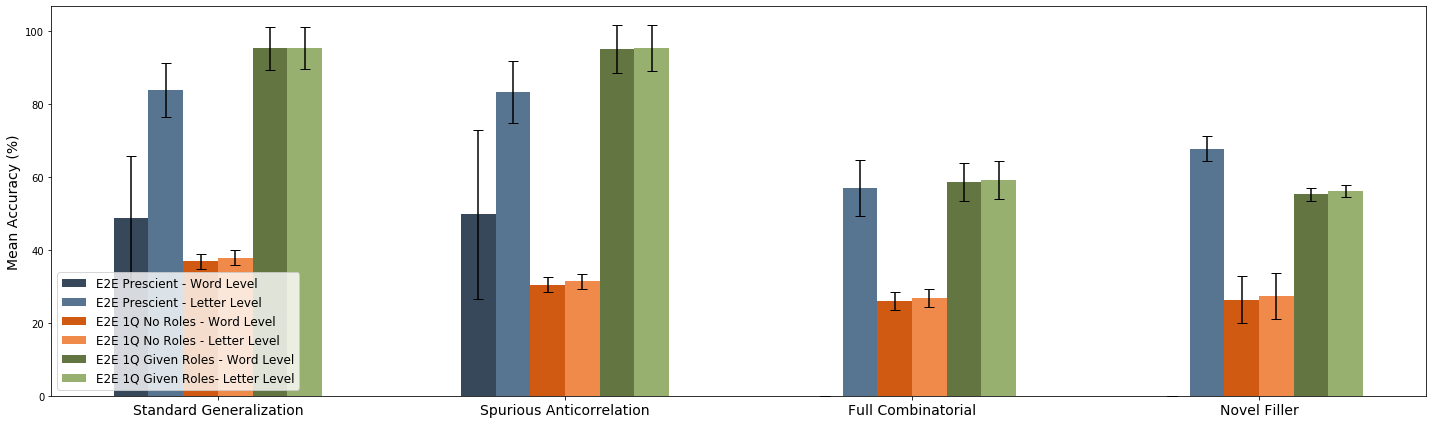

In [6]:
labels = ["Standard Generalization", "Spurious Anticorrelation", "Full Combinatorial", "Novel Filler"]

x = np.arange(len(labels))
width = .10
pos = [x-width*2.5, x-width*1.5, x-width/2, x+width/2, x+width*1.5, x+width*2.5]

fig, ax = plt.subplots(figsize=(20,6))
ax.bar(pos[0], means[0,:,0], width, yerr=ci[0,:,0], capsize=5, label="E2E Prescient - Word Level", color="#364859")
ax.bar(pos[1], means[0,:,1], width, yerr=ci[0,:,1], capsize=5, label="E2E Prescient - Letter Level", color="#577590")
ax.bar(pos[2], means[1,:,0], width, yerr=ci[1,:,0], capsize=5, label="E2E 1Q No Roles - Word Level", color="#D05A11")
ax.bar(pos[3], means[1,:,1], width, yerr=ci[1,:,1], capsize=5, label="E2E 1Q No Roles - Letter Level", color="#F08A4B")
ax.bar(pos[4], means[2,:,0], width, yerr=ci[2,:,0], capsize=5, label="E2E 1Q Given Roles - Word Level", color="#637641")
ax.bar(pos[5], means[2,:,1], width, yerr=ci[2,:,1], capsize=5, label="E2E 1Q Given Roles- Letter Level", color="#98B06F")




ax.set_ylabel('Mean Accuracy (%)',fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=14)
ax.legend(loc="lower left",fontsize=12)

fig.tight_layout()
plt.savefig("Mean_Accuracy_Bargraph.png")
plt.show()

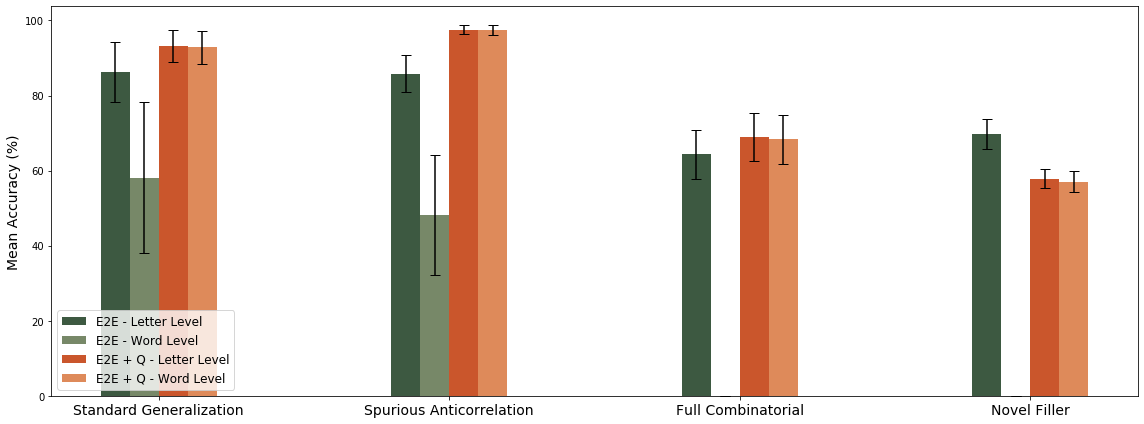

In [12]:
labels = ["Standard Generalization", "Spurious Anticorrelation", "Full Combinatorial", "Novel Filler"]

x = np.arange(len(labels))
width = .10

fig, ax = plt.subplots(figsize=(20,6))
ax.bar(x-width*1.5, wm_letters_mean, width, yerr=wm_letters_ci, capsize=5, label="E2E - Letter Level", color="#3d5941")
ax.bar(x-width/2, wm_words_mean, width, yerr=wm_words_ci, capsize=5, label="E2E - Word Level", color = "#778868")
ax.bar(x+width/2, nested_letters_mean, width, yerr=nested_letters_ci, capsize=5, label="E2E + Q - Letter Level", color="#ca562c")
ax.bar(x+width*1.5, nested_words_mean, width, yerr=nested_words_ci, capsize=5, label="E2E + Q - Word Level", color="#de8a5a")


ax.set_ylabel('Mean Accuracy (%)',fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=14)
ax.legend(loc="lower left",fontsize=12)

fig.tight_layout()
plt.savefig("Mean_Accuracy_Bargraph.png")
plt.show()

# Box Plot

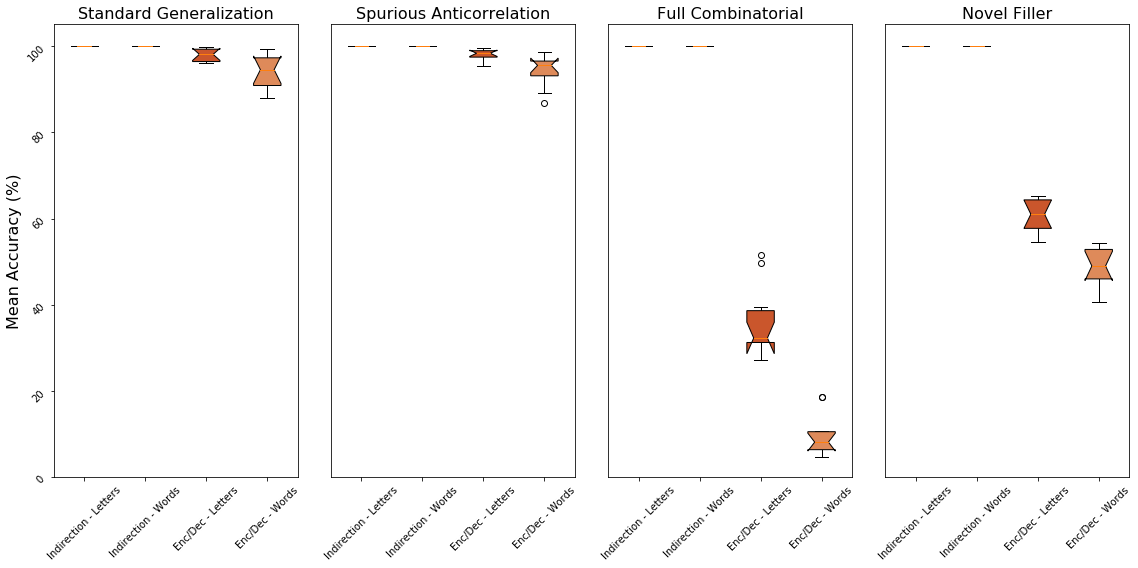

In [95]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4, figsize=(16,8))
labels = ["Indirection - Letters", "Indirection - Words", "Enc/Dec - Letters", "Enc/Dec - Words"]

# rectangular box plot
bplot1 = ax1.boxplot([wm_letters[0], wm_words[0], nested_letters[0], nested_words[0]],
                     vert=True,  # vertical box alignment
                     notch=True,
                     patch_artist=True,  # fill with color
                     labels=labels)  # will be used to label x-ticks
ax1.set_ylim(0,105)
ax1.tick_params(labelrotation=45)
ax1.set_title('Standard Generalization',fontsize=16)
ax1.set_ylabel('Mean Accuracy (%)',fontsize=16)



bplot2 = ax2.boxplot([wm_letters[1], wm_words[1], nested_letters[1], nested_words[1]],
                     vert=True,  # vertical box alignment
                     notch=True,
                     patch_artist=True,  # fill with color
                     labels=labels)  # will be used to label x-ticks
ax2.set_ylim(0,105)
ax2.set_yticks([])
ax2.tick_params(labelrotation=45)
ax2.set_title('Spurious Anticorrelation',fontsize=16)


bplot3 = ax3.boxplot([wm_letters[2], wm_words[2], nested_letters[2], nested_words[2]],
                     vert=True,  # vertical box alignment
                     notch=True,
                     patch_artist=True,  # fill with color
                     labels=labels)  # will be used to label x-ticks
ax3.set_ylim(0,105)
ax3.set_yticks([])
ax3.tick_params(labelrotation=45)
ax3.set_title('Full Combinatorial',fontsize=16)


bplot4 = ax4.boxplot([wm_letters[3], wm_words[3], nested_letters[3], nested_words[3]],
                     vert=True,  # vertical box alignment
                     notch=True,
                     patch_artist=True,  # fill with color
                     labels=labels)  # will be used to label x-ticks
ax4.set_ylim(0,105)
ax4.set_yticks([])
ax4.tick_params(labelrotation=45)
ax4.set_title('Novel Filler',fontsize=16)

# fill with colors
colors = ['#3d5941', '#778868', '#ca562c', '#de8a5a']
for bplot in (bplot1, bplot2, bplot3, bplot4):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)
        
fig.tight_layout()
plt.savefig("Mean_Accuracy_Boxplot.png")
plt.show()